# <span style="color:#336699">simplecube - An simple python package for creating satellite image data cubes based on Brazil Data Cube </span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Gabriel Sansigolo<sup><a href="https://orcid.org/0000-0003-0789-5858"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:gabriel.sansigolo@inpe.br">gabriel.sansigolo@inpe.br</a>
    <br/><br/>
    Last Update: June 15, 2024
</div>

<br/>


In [1]:
#!pip install git+https://github.com/GSansigolo/simplecube

In [2]:
from simplecube import hls_simple_cube, get_timeseries_datacube
from pyproj import Transformer
import os

In [3]:
path_dir = os.path.abspath("")

In [4]:
cube = hls_simple_cube(
    data_dir=os.path.join(path_dir,'T22JBP/')
)

cube

<xarray.Dataset> Size: 11GB
Dimensions:      (band: 1, x: 7320, y: 3660, time: 104)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 59kB 2e+05 2e+05 2.001e+05 ... 8.097e+05 8.097e+05
  * y            (y) float64 29kB -3.1e+06 -3.1e+06 ... -3.21e+06 -3.21e+06
  * time         (time) datetime64[ns] 832B 2024-01-05T13:38:31 ... 2024-12-3...
    spatial_ref  int64 8B 0
Data variables:
    band_data    (time, band, y, x) float32 11GB 8.002e+03 ... 3.293e+03

In [5]:
transformer = Transformer.from_crs("EPSG:4326","EPSG:32621")
point = transformer.transform( -54.590904547439635, -28.254666015508501)
point

(2328902.1622603387, -6436751.815267692)

In [6]:
ts_nir = get_timeseries_datacube(
    cube=cube, 
    geom=[dict(coordinates = [point[0], point[1]])],
)

In [7]:
ts_nir

{'values': [7318.0,
  6905.0,
  7629.0,
  7680.0,
  494.0,
  5783.0,
  7490.0,
  8283.0,
  7075.0,
  5329.0,
  4926.0,
  6322.0,
  793.0,
  1176.0,
  5114.0,
  4686.0,
  3063.0,
  6420.0,
  2143.0,
  nan,
  4153.0,
  nan,
  5075.0,
  4254.0,
  4879.0,
  5326.0,
  nan,
  -165.0,
  nan,
  -34.0,
  4462.0,
  6352.0,
  6444.0,
  101.0,
  483.0,
  -10.0,
  116.0,
  5973.0,
  899.0,
  3091.0,
  6226.0,
  452.0,
  3871.0,
  nan,
  4703.0,
  6243.0,
  -148.0,
  6114.0,
  6139.0,
  5829.0,
  6484.0,
  2102.0,
  5718.0,
  2722.0,
  2446.0,
  6512.0,
  664.0,
  1327.0,
  6439.0,
  7312.0,
  3467.0,
  7296.0,
  7558.0,
  -88.0,
  7206.0,
  7814.0,
  7547.0,
  7229.0,
  7313.0,
  7149.0,
  nan,
  7198.0,
  7373.0,
  2302.0,
  6683.0,
  7403.0,
  7773.0,
  4529.0,
  6891.0,
  5219.0,
  6661.0,
  7068.0,
  6496.0,
  6293.0,
  4809.0,
  4662.0,
  4193.0,
  3053.0,
  4498.0,
  4154.0,
  4386.0,
  4143.0,
  333.0,
  3272.0,
  2942.0,
  2735.0,
  1056.0,
  291.0,
  3554.0,
  427.0,
  1270.0,
  3319.0,
  

In [8]:
import matplotlib.pyplot as plt

/home/sansigolo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


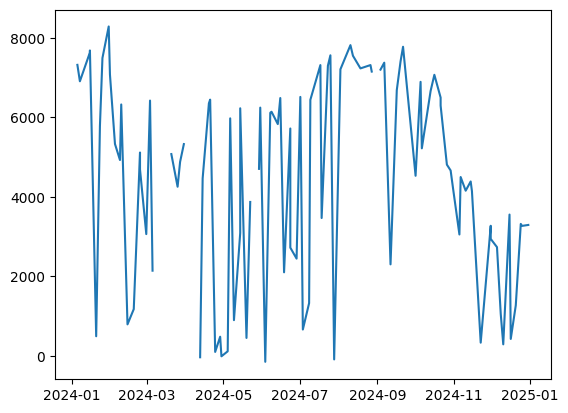

In [9]:
plt.plot(ts_nir['timeline'], ts_nir['values'],)